# Visualization

In [2]:
import geopandas as gpd
import mapclassify
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
from mpl_toolkits.axes_grid1 import make_axes_locatable

In [15]:
# Load data
gdf = gpd.read_file('./va_admin_bndry/VirginiaCounty_ClippedToShoreline.shx')
mdf = pd.read_csv('merged_data.csv')

In [18]:
# Merge shapefile data and county adjacency data:
gdf['FIPS_left'] = pd.to_numeric(gdf['STCOFIPS']) 
df = gdf.merge(mdf,left_on='FIPS_left',right_on='county_fips')
del gdf, mdf

In [25]:
vdf = pd.read_csv('./data/voting_VA.csv') # Load historical voting data
cdf = pd.read_csv('./data/county_adjacencies.csv') 

In [22]:
df.columns

Index(['STCOFIPS', 'GNIS', 'NAME', 'NAMELSAD', 'GSOURCE', 'LADOPT',
       'LASTUPDATE', 'JURISTYPE', 'AREASQMI', 'Shape_Leng', 'Shape_Area',
       'geometry', 'FIPS_left', 'year', 'county_name', 'county_fips',
       'candidate', 'party', 'candidatevotes', 'totalvotes', 'population_2022',
       'district', 'N1', 'N2', 'N3', 'N4', 'N5', 'N6', 'N7', 'N8', 'N9', 'N10',
       'N11', 'N12'],
      dtype='object')

In [30]:
df.head()

,STCOFIPS,GNIS,NAME,NAMELSAD,GSOURCE,LADOPT,LASTUPDATE,JURISTYPE,AREASQMI,Shape_Leng,...,N3,N4,N5,N6,N7,N8,N9,N10,N11,N12
0,51001,1480091,Accomack,Accomack County,T,N,2014-08-20,CO,1195.366291,4949956.957,...,MIDDLESEX,MATHEWS,NORTHAMPTON,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,51001,1480091,Accomack,Accomack County,T,N,2014-08-20,CO,1195.366291,4949956.957,...,MIDDLESEX,MATHEWS,NORTHAMPTON,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,51001,1480091,Accomack,Accomack County,T,N,2014-08-20,CO,1195.366291,4949956.957,...,MIDDLESEX,MATHEWS,NORTHAMPTON,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,51001,1480091,Accomack,Accomack County,T,N,2014-08-20,CO,1195.366291,4949956.957,...,MIDDLESEX,MATHEWS,NORTHAMPTON,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,51001,1480091,Accomack,Accomack County,T,N,2014-08-20,CO,1195.366291,4949956.957,...,MIDDLESEX,MATHEWS,NORTHAMPTON,NaN,NaN,NaN,NaN,NaN,NaN,NaN


<Axes: >

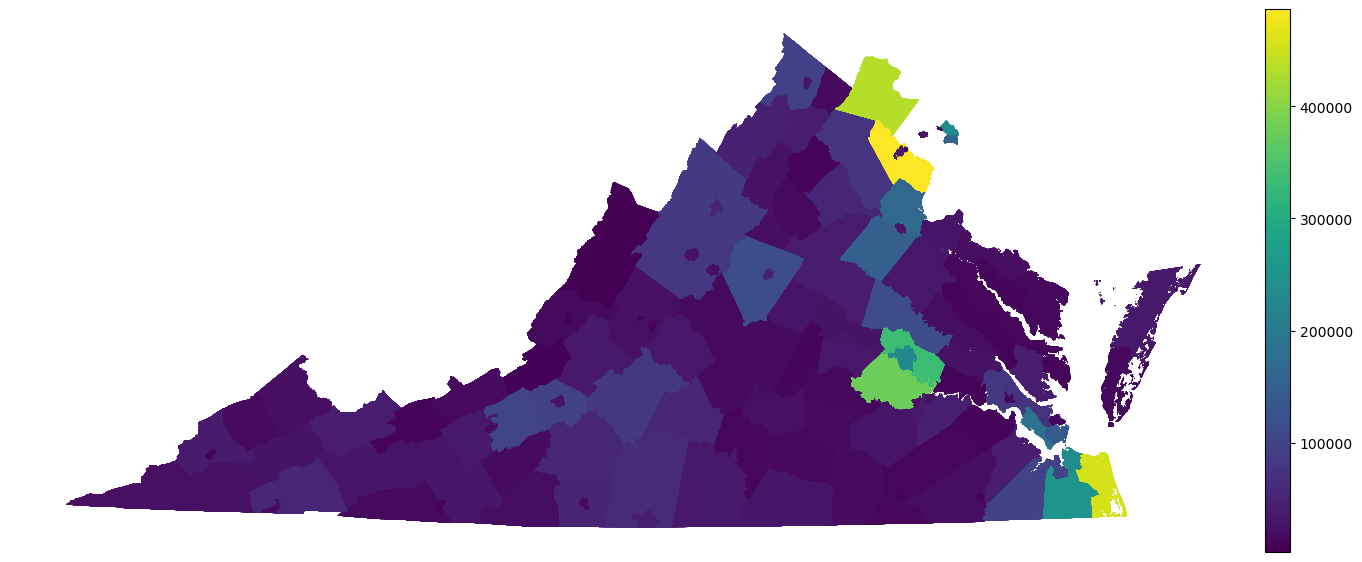

In [23]:
fig = plt.figure()
ax = fig.add_axes([0, 0, 2, 2])
divider = make_axes_locatable(ax)
ax.axis('off')
cax = divider.append_axes("right", size="2%", pad=0.08)
df.plot(ax=ax,column='population_2022',legend=True,cax=cax)

# Demographic Data

In [41]:
demo = pd.read_csv('./data/county_data/0002_ds176_20105_county_M.csv')
demo = demo.drop('Unnamed: 0', axis=1)
labels = demo.iloc[0]
demo = demo.iloc[1:] # remove the first row
demo.head()

/var/folders/4d/13vvrd7531qclhwg2svgst3c0000gn/T/ipykernel_29149/2280053374.py:1: DtypeWarning: Columns (4,5,7,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99,100,101,102,103,104,105,106,107,108,109,110,111,112,113,114,115,116,117,118,119,120,121,122,123,124,125,126,127,128,129,130,131,132,133,134,135,136,137,138,139,140,141,142,143,144,145,146,147,148,149,150,151,152,153,154,155,156,157,158,159,160,161,162,163,164,165,166,167,168,169,170,171,172,173,174,175,176,177,178,179,180,181,182,183,184,185,186,187,188,189,190,191,192,193,194,195,196,197,198,199,200,201,202,203,204,205,206,207,208,209,210,211,212,213,214,215,216,217,218,219,220,221,222,223,224,225,226,227,228,229,230,231,232,233,234,235,236,237,238,239,240,241,242,243,244,245,246,247,248,249,250,251,252,254,255,256,25

,GISJOIN,YEAR,STUSAB,REGIONA,DIVISIONA,STATE,STATEA,COUNTY,COUNTYA,COUSUBA,...,JSDM003,JSDM004,JSDM005,JSDM006,JSDM007,JSDM008,JSDM009,JSDM010,JS5M001,JTIM001
1,G0100010,2006-2010,AL,NaN,NaN,Alabama,01,Autauga County,001,NaN,...,316,389,353,275,258,168,78,161,45,3968
2,G0100030,2006-2010,AL,NaN,NaN,Alabama,01,Baldwin County,003,NaN,...,1003,998,817,838,574,457,297,369,28,3948
3,G0100050,2006-2010,AL,NaN,NaN,Alabama,01,Barbour County,005,NaN,...,155,279,229,273,247,183,155,195,33,6409
4,G0100070,2006-2010,AL,NaN,NaN,Alabama,01,Bibb County,007,NaN,...,148,321,269,308,273,217,111,201,48,8918
5,G0100090,2006-2010,AL,NaN,NaN,Alabama,01,Blount County,009,NaN,...,289,523,449,362,344,266,227,227,32,5349


In [57]:
vadf[vadf['COUNTY'] == 'Albemarle County']

,GISJOIN,YEAR,STUSAB,REGIONA,DIVISIONA,STATE,STATEA,COUNTY,COUNTYA,COUSUBA,...,JSDM003,JSDM004,JSDM005,JSDM006,JSDM007,JSDM008,JSDM009,JSDM010,JS5M001,JTIM001
2822,G5100030,2006-2010,VA,NaN,NaN,Virginia,51,Albemarle County,3.0,NaN,...,458,573,551,541,349,339,167.0,406.0,31.0,8613.0


In [48]:
labels.unique()

array(['GIS Join Match Code', 'Data File Year',
       'State Postal Abbreviation', 'Region Code', 'Division Code',
       'State Name', 'State Code', 'County Name', 'County Code',
       'County Subdivision Code', 'Place Code', 'Census Tract Code',
       'Block Group Code', 'Consolidated City Code',
       'American Indian Area/Alaska Native Area/Hawaiian Home Land Code',
       'American Indian Area/Alaska Native Area (Reservation or Statistical Entity Only) Code',
       'American Indian Area (Off-Reservation Trust Land Only)/Hawaiian Home Land Code',
       'American Indian Trust Land/ Hawaiian Home Land Indicator',
       'Tribal Subdivision/Remainder Code',
       'Alaska Native Regional Corporation Code',
       'Metropolitan Statistical Area/Micropolitan Statistical Area Code',
       'Combined Statistical Area Code', 'Metropolitan Division Code',
       'New England City and Town Area Code',
       'Combined New England City and Town Area Code',
       'New England City and T